## StarAgile Assignment - Machine Learning - Level 1 - Assignment - 03
### Submitted by VINAY.M on 12-09-2023


Image Classification - Sports Images Classification

- Problem Statement :

  - Apply various models to Sports Images and go with the best model that helps in classifying which sport that image belongs to.

  - Dataset Link : https://drive.google.com/drive/folders/168kbX_a3qSn2Q786RzTpUpXU3sZ-7GcP?usp=share_link

- What Kind Of Approach You Could Follow for your Problem Statements :

  - Reading the Data, Understanding the Data, Exploratory Data Analysis, Data Visualization, Splitting the Data, Training and Testing, Modeling, Accuracy

  - Hints provided are only for your references or getting started. You’re free to use your own methodology to work on your assignments.

In [ ]:
# Given Data contains images from 22 different sports type.
# Since Laptop is not capable of creating models and Modelling will be performed with Google Colab
# StarAgile Given data extracted and re-uploaded to personal google drive
# Mypath
# /content/drive/MyDrive/DS_Datasets/Sports_Classification/SportsData_StarAgile

In [ ]:
# Mounting Google Drive for Getting access to uploaded Sports Image
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Import / Installing Important Libraries**

In [ ]:
# Uncomment below line and run, if not installed
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
import tensorflow as tf
import sys
import os

In [ ]:
print ('Running in colab:', 'google.colab' in sys.modules)

Running in colab: True


**Remove Dodgy Images**

In [ ]:
import cv2
import imghdr

In [ ]:
data_path = '/content/drive/MyDrive/DS_Datasets/Sports_Classification/SportsData_StarAgile/'

In [ ]:
image_ext_required = ['jpeg','jpg','bmp','png']

In [ ]:
count = 0
for image_class in os.listdir(data_path):
  for image in os.listdir(os.path.join(data_path, image_class)):
    img_path = os.path.join(data_path, image_class, image)

    try:
      img = cv2.imread(img_path)
      tip = imghdr.what(img_path)

      if tip not in image_ext_required:
        print("Image is not of desired extention", format(img_path))
        os.remove(img_path)
    except Exception as e:
      #print("Issue with the image")
      count = count + 1
      os.remove(img_path)
print(f"Total Images Removed: {count}")

Total Images Removed: 0


In [ ]:
folders = sorted(os.listdir(data_path))
folders

['badminton',
 'baseball',
 'basketball',
 'boxing',
 'chess',
 'cricket',
 'fencing',
 'football',
 'formula1',
 'gymnastics',
 'hockey',
 'ice_hockey',
 'kabaddi',
 'motogp',
 'shooting',
 'swimming',
 'table_tennis',
 'tennis',
 'volleyball',
 'weight_lifting',
 'wrestling',
 'wwe']

In [ ]:
# Create a Dictionary for folder names
folderLabels = {}
for index, value in enumerate(folders):
  folderLabels[value] = index
folderLabels

{'badminton': 0,
 'baseball': 1,
 'basketball': 2,
 'boxing': 3,
 'chess': 4,
 'cricket': 5,
 'fencing': 6,
 'football': 7,
 'formula1': 8,
 'gymnastics': 9,
 'hockey': 10,
 'ice_hockey': 11,
 'kabaddi': 12,
 'motogp': 13,
 'shooting': 14,
 'swimming': 15,
 'table_tennis': 16,
 'tennis': 17,
 'volleyball': 18,
 'weight_lifting': 19,
 'wrestling': 20,
 'wwe': 21}

In [ ]:
class_names = list(folderLabels.keys())

**Loading of Training Data**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
datasets = tf.keras.utils.image_dataset_from_directory(data_path)
datasets.class_names

Found 14065 files belonging to 22 classes.


['badminton',
 'baseball',
 'basketball',
 'boxing',
 'chess',
 'cricket',
 'fencing',
 'football',
 'formula1',
 'gymnastics',
 'hockey',
 'ice_hockey',
 'kabaddi',
 'motogp',
 'shooting',
 'swimming',
 'table_tennis',
 'tennis',
 'volleyball',
 'weight_lifting',
 'wrestling',
 'wwe']

In [ ]:
data_iterator = datasets.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
batch = data_iterator.next()

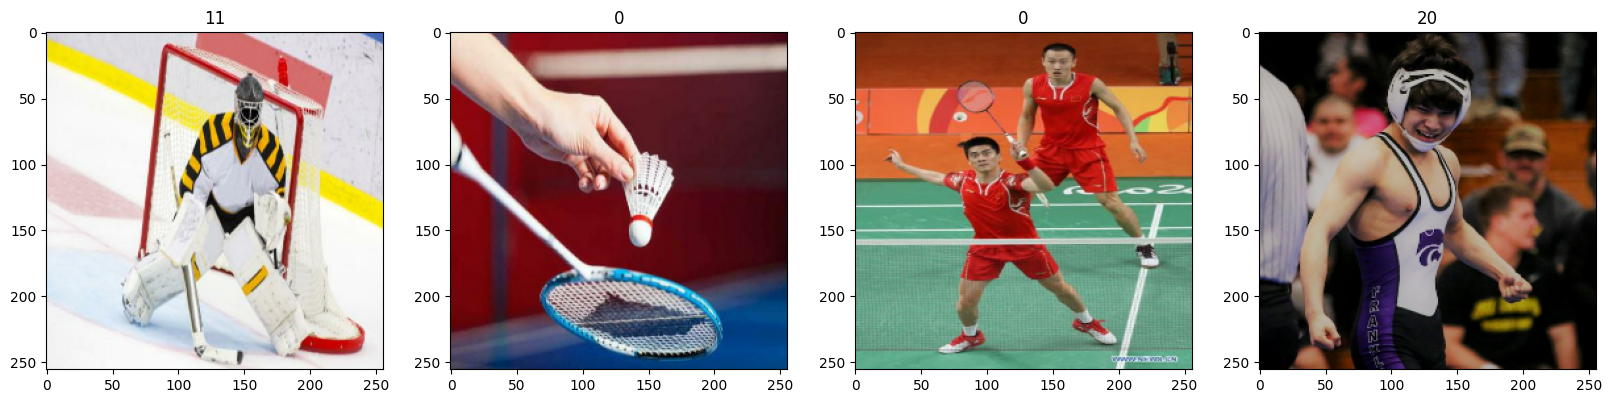

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled_data = datasets.map(lambda x,y:(x/255,y))

In [ ]:
scaled_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
scaled_data.as_numpy_iterator().next()

(array([[[[0.33146447, 0.73164827, 0.80802697],
          [0.36473653, 0.7288603 , 0.8185049 ],
          [0.38072917, 0.7056373 , 0.80909926],
          ...,
          [0.35569853, 0.7523591 , 0.8136029 ],
          [0.4117647 , 0.74791664, 0.8465074 ],
          [0.40579045, 0.7352022 , 0.837163  ]],
 
         [[0.3523635 , 0.7449799 , 0.8251423 ],
          [0.3690523 , 0.73317605, 0.82282066],
          [0.37839392, 0.703302  , 0.806764  ],
          ...,
          [0.3845197 , 0.772726  , 0.83630514],
          [0.40529102, 0.7457588 , 0.83893996],
          [0.38291088, 0.7162837 , 0.816264  ]],
 
         [[0.36965153, 0.7528493 , 0.8368413 ],
          [0.37921777, 0.7338525 , 0.8256026 ],
          [0.37375176, 0.69865984, 0.8021219 ],
          ...,
          [0.3852526 , 0.7615275 , 0.83029675],
          [0.37552083, 0.7251157 , 0.814408  ],
          [0.34322688, 0.6841276 , 0.78034395]],
 
         ...,
 
         [[0.35745227, 0.69470716, 0.8005895 ],
          [0.37006

In [ ]:
print(len(scaled_data))
train_size = int(len(scaled_data)*0.7)
val_size = int(len(scaled_data)*0.2)
test_size = int(len(scaled_data)*0.1)

440


In [ ]:
train_size

308

In [ ]:
val_size

88

In [ ]:
test_size

44

In [ ]:
train = scaled_data.take(train_size)
test = scaled_data.skip(train_size).take(test_size)
val = scaled_data.skip(train_size+test_size).take(val_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# 256,256,3 , here 3 is channels (number of bands in an image)

**Train our CNN model on Training Dataset**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
labels = datasets.class_names
labels

['badminton',
 'baseball',
 'basketball',
 'boxing',
 'chess',
 'cricket',
 'fencing',
 'football',
 'formula1',
 'gymnastics',
 'hockey',
 'ice_hockey',
 'kabaddi',
 'motogp',
 'shooting',
 'swimming',
 'table_tennis',
 'tennis',
 'volleyball',
 'weight_lifting',
 'wrestling',
 'wwe']

In [ ]:
model = Sequential()

# Conv2D layer with 16 filters, 3x3 kernel, ReLU activation, and input shape
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))

# MaxPooling2D layer
model.add(MaxPooling2D(pool_size= 2))

# Conv2D layer with 32 filters, 3x3 kernel, ReLU activation
model.add(Conv2D(32, (3, 3), 1, activation='relu'))

# MaxPooling2D layer
model.add(MaxPooling2D(pool_size= 2))

# Conv2D layer with 16 filters, 3x3 kernel, ReLU activation
model.add(Conv2D(16, (3, 3), 1, activation='relu'))

# MaxPooling2D layer
model.add(MaxPooling2D(pool_size= 2))

# Flatten the output
model.add(Flatten())

# Dense layer with 128 units and ReLU activation
model.add(Dense(256, activation='relu'))

# 22 classes with softmax activation
model.add(Dense(len(datasets.class_names), activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**Model Training**

In [ ]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
from keras import callbacks
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
308/308 [==============================] - 936s 3s/step - loss: 2.4397 - accuracy: 0.2699 - val_loss: 2.1066 - val_accuracy: 0.3781
Epoch 2/10
308/308 [==============================] - 919s 3s/step - loss: 1.8231 - accuracy: 0.4616 - val_loss: 1.8830 - val_accuracy: 0.4470
Epoch 3/10
308/308 [==============================] - 913s 3s/step - loss: 1.3671 - accuracy: 0.5899 - val_loss: 1.9816 - val_accuracy: 0.4466
Epoch 4/10
308/308 [==============================] - 908s 3s/step - loss: 0.8201 - accuracy: 0.7577 - val_loss: 2.3099 - val_accuracy: 0.4206
Epoch 5/10
308/308 [==============================] - 908s 3s/step - loss: 0.4175 - accuracy: 0.8790 - val_loss: 3.0096 - val_accuracy: 0.4084
Epoch 6/10
308/308 [==============================] - 908s 3s/step - loss: 0.2064 - accuracy: 0.9409 - val_loss: 3.5436 - val_accuracy: 0.4038
Epoch 7/10
308/308 [==============================] - 913s 3s/step - loss: 0.1373 - accuracy: 0.9619 - val_loss: 3.9733 - val_accuracy: 0.4009

In [ ]:
#Model Training Ends

In [ ]:
#Plotting the performance - Training Accuracy and Validation Accuracy

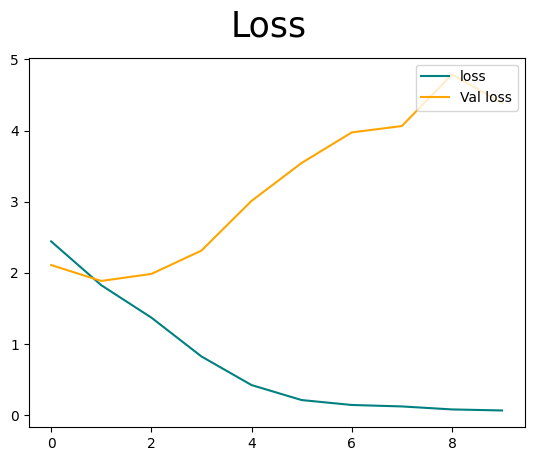

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='Val loss')
fig.suptitle("Loss", fontsize=25)
plt.legend(loc='upper right')
plt.show()


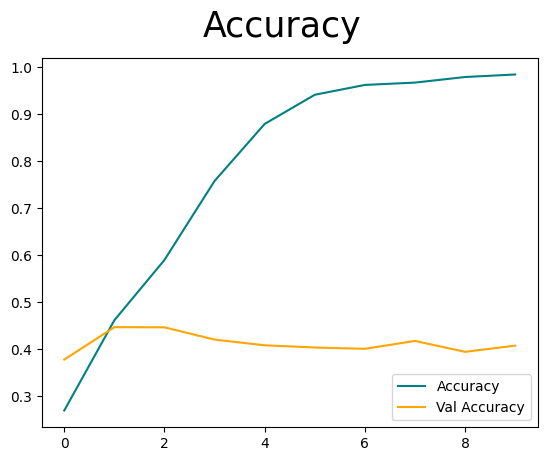

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Val Accuracy')
fig.suptitle("Accuracy", fontsize=25)
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [ ]:
# Create an instance of the SparseCategoricalAccuracy metric.
metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Call the `update_state` method for each input/label pair.
for X, y in test:
  metric.update_state(y, model.predict(X))

# Call the `result` method to get the final accuracy score.
accuracy = metric.result()

# Print the accuracy score.
print('Accuracy:', accuracy)

1/1 [==============================] - 1s 1s/step
Accuracy: tf.Tensor(0.51846594, shape=(), dtype=float32)


In [ ]:
print(accuracy)

tf.Tensor(0.51846594, shape=(), dtype=float32)


In [ ]:
#Testing the model

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DS_Datasets/Sports_Classification/test.jpg')

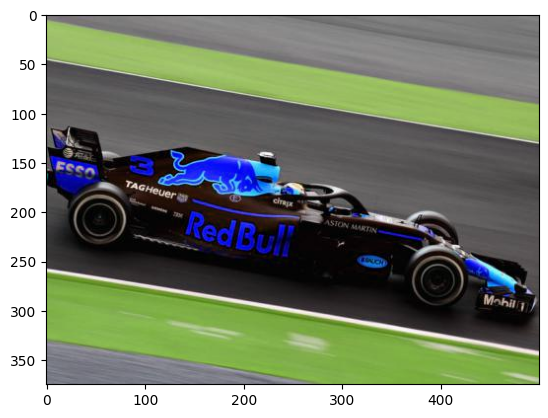

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
#Read as RBG

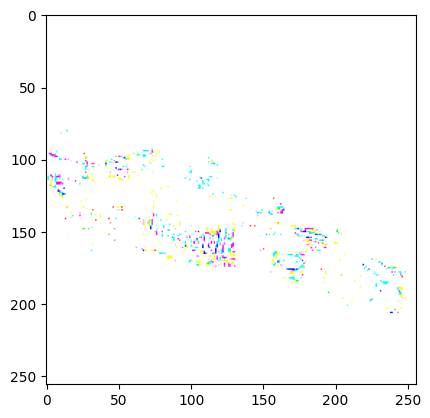

In [ ]:
#resize
resized = tf.image.resize(img, (256,256))
plt.imshow(resized)
plt.show()

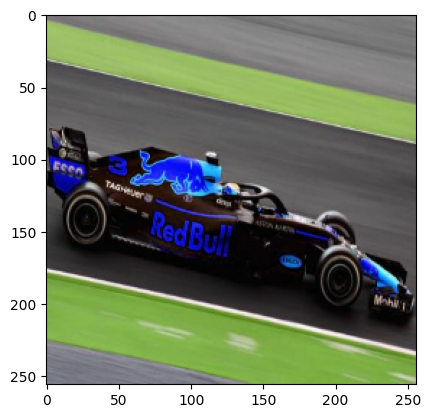

In [ ]:
#resize
resized = tf.image.resize(img, (256,256))
plt.imshow(resized.numpy().astype(int))
plt.show()

In [ ]:
predictions = model.predict(np.expand_dims(resized/255,0))

1/1 [==============================] - 0s 217ms/step


In [ ]:
predictions

array([[2.65907060e-04, 2.22427752e-05, 3.56513263e-09, 2.16710168e-06,
        6.79050790e-05, 3.46566109e-10, 3.32177078e-05, 4.08718675e-01,
        5.06906807e-01, 1.40236343e-05, 4.74949848e-05, 4.19803037e-09,
        8.12861833e-10, 5.36027364e-03, 1.01295045e-05, 1.11075497e-05,
        6.71933815e-02, 1.09981168e-02, 5.75902048e-10, 3.48480447e-04,
        4.49890653e-10, 2.48681058e-08]], dtype=float32)

In [ ]:
folders

['badminton',
 'baseball',
 'basketball',
 'boxing',
 'chess',
 'cricket',
 'fencing',
 'football',
 'formula1',
 'gymnastics',
 'hockey',
 'ice_hockey',
 'kabaddi',
 'motogp',
 'shooting',
 'swimming',
 'table_tennis',
 'tennis',
 'volleyball',
 'weight_lifting',
 'wrestling',
 'wwe']

In [ ]:
class_labels = {}
for index, value in enumerate(folders):
  class_labels[index] = value
class_labels

{0: 'badminton',
 1: 'baseball',
 2: 'basketball',
 3: 'boxing',
 4: 'chess',
 5: 'cricket',
 6: 'fencing',
 7: 'football',
 8: 'formula1',
 9: 'gymnastics',
 10: 'hockey',
 11: 'ice_hockey',
 12: 'kabaddi',
 13: 'motogp',
 14: 'shooting',
 15: 'swimming',
 16: 'table_tennis',
 17: 'tennis',
 18: 'volleyball',
 19: 'weight_lifting',
 20: 'wrestling',
 21: 'wwe'}

In [ ]:
for class_index, probability in enumerate(predictions[0]):
    class_label = class_labels.get(class_index, 'Unknown')
    print("Class: {}, Probability: {:.2f}%".format(class_label, probability * 100))

Class: badminton, Probability: 0.03%
Class: baseball, Probability: 0.00%
Class: basketball, Probability: 0.00%
Class: boxing, Probability: 0.00%
Class: chess, Probability: 0.01%
Class: cricket, Probability: 0.00%
Class: fencing, Probability: 0.00%
Class: football, Probability: 40.87%
Class: formula1, Probability: 50.69%
Class: gymnastics, Probability: 0.00%
Class: hockey, Probability: 0.00%
Class: ice_hockey, Probability: 0.00%
Class: kabaddi, Probability: 0.00%
Class: motogp, Probability: 0.54%
Class: shooting, Probability: 0.00%
Class: swimming, Probability: 0.00%
Class: table_tennis, Probability: 6.72%
Class: tennis, Probability: 1.10%
Class: volleyball, Probability: 0.00%
Class: weight_lifting, Probability: 0.03%
Class: wrestling, Probability: 0.00%
Class: wwe, Probability: 0.00%


In [ ]:
for class_index, probability in sorted(enumerate(predictions[0]), key=lambda x: x[1], reverse=True):
  class_label = class_labels.get(class_index, 'Unknown')
  print("Class: {}, Probability: {:.2f}%".format(class_label, probability * 100))

Class: formula1, Probability: 50.69%
Class: football, Probability: 40.87%
Class: table_tennis, Probability: 6.72%
Class: tennis, Probability: 1.10%
Class: motogp, Probability: 0.54%
Class: weight_lifting, Probability: 0.03%
Class: badminton, Probability: 0.03%
Class: chess, Probability: 0.01%
Class: hockey, Probability: 0.00%
Class: fencing, Probability: 0.00%
Class: baseball, Probability: 0.00%
Class: gymnastics, Probability: 0.00%
Class: swimming, Probability: 0.00%
Class: shooting, Probability: 0.00%
Class: boxing, Probability: 0.00%
Class: wwe, Probability: 0.00%
Class: ice_hockey, Probability: 0.00%
Class: basketball, Probability: 0.00%
Class: kabaddi, Probability: 0.00%
Class: volleyball, Probability: 0.00%
Class: wrestling, Probability: 0.00%
Class: cricket, Probability: 0.00%


In [ ]:
for class_index, probability in sorted(enumerate(predictions[0]), key=lambda x: x[1], reverse=True):
  if probability > 0.1:
    class_label = class_labels.get(class_index, 'Unknown')
    print("Top Class: {}, Probability: {:.2f}%".format(class_label, probability * 100))

Top Class: formula1, Probability: 50.69%
Top Class: football, Probability: 40.87%


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join("/content/drive/MyDrive/MyDrive/DS_Datasets/Sports_Classification/",'image22classifier.h5'))

In [ ]:
new_model = load_model('/content/drive/MyDrive/MyDrive/DS_Datasets/Sports_Classification/image22classifier.h5')